In [1]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
data = pd.read_csv('/content/Customers.csv')

In [7]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Profession'] = label_encoder.fit_transform(data['Profession'])

In [8]:
# Feature selection
X = data.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)  # Features
y = data['Spending Score (1-100)']  # Target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
predictions = rf_regressor.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 827.2598375


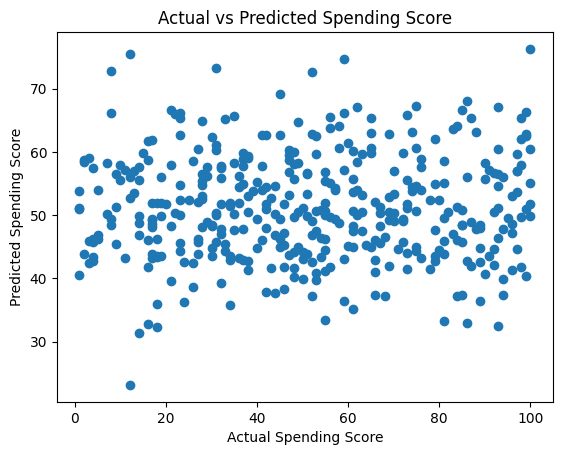

In [17]:
import matplotlib.pyplot as plt

# Visualizing actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.title('Actual vs Predicted Spending Score')
plt.show()

## **PCA**

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




In [23]:
X = data.drop(['CustomerID'], axis=1)  # Features
y = data['Spending Score (1-100)']  # Target variable

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
pca = PCA(n_components=2)  # You can specify the number of components you want
X_pca = pca.fit_transform(X_scaled)

In [26]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.16455303 0.15072237]


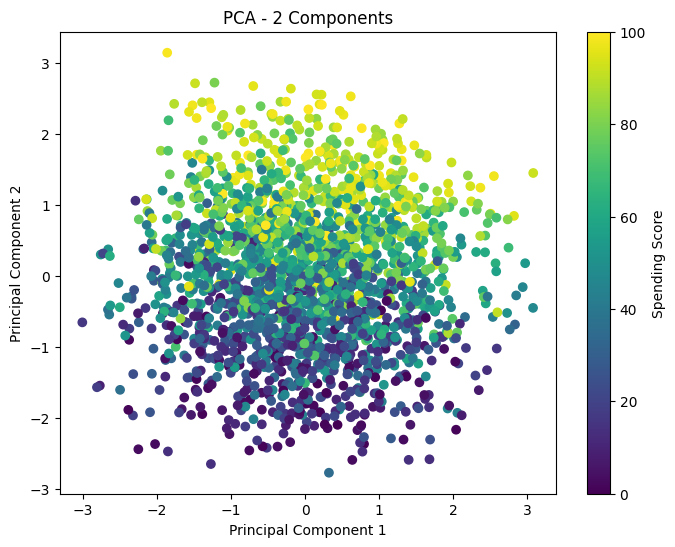

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Components')
plt.colorbar(label='Spending Score')
plt.show()